---

## **Introduction**

### Non-Stationary Problem

| Slot Machine Number | Reward | Probability |
|----------------------|--------|-------------|
| 0                    | 1      | 0.10        |
| 1                    | 1      | 0.30        |
| 2                    | 1      | 0.50        |
| 3                    | 1      | 0.30        |
| 4                    | 1      | 0.20        |

The initial rewards and probabilities for each slot machine are shown in the table above.  
For every play, the probability of receiving a reward fluctuates slightly, and these changes accumulate over time.  
As a result, it becomes advantageous to place more importance on recent rewards than older ones, as this allows the model to adapt better to the changing probabilities.  

Thus, it is expected that the **Exponential Weighted Moving Average (EWMA)** method, which assigns greater weight to recent rewards, will perform more accurate predictions compared to the **Moving Average (MA)** method.

---


In [161]:
import numpy as np

class Bandit:
  def __init__(self, total_num_machine = 5):
    self.win_rates = np.array([0.1, 0.2, 0.5, 0.3, 0.2]) # 보상의 크기는 각각 1이다.
  def game_play(self, machine_num):
    noise = np.random.uniform(low = -0.5, high = 0.5) # 노이즈 추가
    self.win_rates[machine_num] += noise
    if self.win_rates[machine_num] >= np.random.rand():
      return 1
    else:
      return 0

class Agent:
  def __init__(self, total_num_machine = 5):
    self.ema_Qs = np.zeros(total_num_machine) # exponential moving everage
    self.ma_Qs = np.zeros(total_num_machine) # moving everage
    self.ns = np.zeros(total_num_machine)
    self.alpha = 0.8
    self.epsilon = 0.2

  def get_action(self, total_num_machine = 5):
    pass

  def update_action_value(self, action, reward):
    pass

  def reset(self, total_num_machine = 5):
    self.ema_Qs = np.zeros(total_num_machine) # exponential moving everage
    self.ma_Qs = np.zeros(total_num_machine) # moving everage

In [162]:
class Agent_ema(Agent):     # agent using exponential moving average
  def get_action(self, total_num_machine = 5):
    if self.epsilon >= np.random.rand():
      action = np.random.randint(low = 0, high = total_num_machine)
    else:
      action = np.argmax(self.ema_Qs)
    return action
  def update_action_value(self, action, reward):
    self.ema_Qs[action] += self.alpha * (reward - self.ema_Qs[action])

class Agent_ma(Agent):    # agent using moving average
  def get_action(self, total_num_machine = 5):
    if self.epsilon >= np.random.rand():
      action = np.random.randint(low = 0, high = total_num_machine)
    else:
      action = np.argmax(self.ma_Qs)
    self.ns[action] += 1
    return action
  def update_action_value(self, action, reward):
    self.ma_Qs[action] += 1/self.ns[action] * (reward - self.ma_Qs[action])

In [163]:
bandit = Bandit()
agent_ema = Agent_ema()
agent_ma = Agent_ma()

In [164]:
total_run = 100
total_episode = 2000
agent_ema_trajectory = np.zeros(shape = (total_run, total_episode))
agent_ma_trajectory = np.zeros(shape = (total_run, total_episode))

for run in range(total_run):
  reward_ema_history = []
  reward_ma_history = []
  ema_total_reward = 0
  ma_total_reward = 0
  for episode in range(1, total_episode + 1):
    action_ema = agent_ema.get_action()
    action_ma = agent_ma.get_action()

    reward_ema = bandit.game_play(action_ema)
    reward_ma = bandit.game_play(action_ma)

    agent_ema.update_action_value(action_ema, reward_ema)
    agent_ma.update_action_value(action_ma, reward_ma)

    ema_total_reward += reward_ema
    ma_total_reward += reward_ma

    reward_ema_history.append(ema_total_reward / episode)
    reward_ma_history.append(ma_total_reward / episode)

  agent_ema_trajectory[run] = reward_ema_history
  agent_ma_trajectory[run] = reward_ma_history

In [165]:
agent_ema_trajectory_avg = np.average(agent_ema_trajectory, axis = 0)
agent_ma_trajectory_avg = np.average(agent_ma_trajectory, axis = 0)

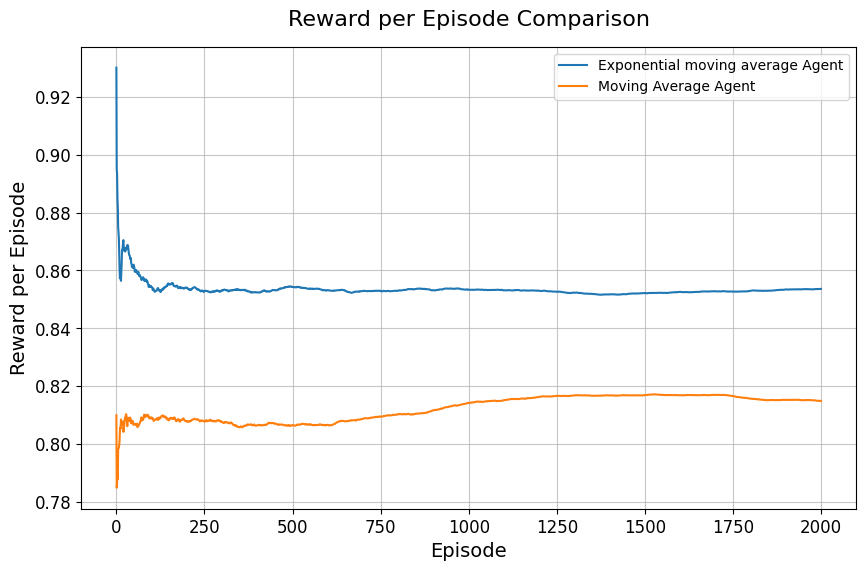

In [166]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(agent_ema_trajectory_avg, label = 'Exponential moving average Agent')
plt.plot(agent_ma_trajectory_avg, label = 'Moving Average Agent')

plt.title('Reward per Episode Comparison', fontsize=16, pad=15)
plt.xlabel('Episode', fontsize=14)
plt.ylabel('Reward per Episode', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend()
plt.grid(alpha = 0.7)
# plt.tight_layout()
plt.show()


---

## **Conclusion**

The results of the Exponential Moving Average (EMA) and Moving Average (MA) methods shown above are based on 2,000 episodes repeated 100 times for each method, and the values represent the averages over these 100 repetitions.

Therefore, the results can be considered statistically significant.

As explained in the introduction, assigning greater weight to recent rewards in the Exponential Moving Average method led to higher rewards per episode compared to the Moving Average method. However, a drawback of the Exponential Moving Average is that it is influenced by its initial value, leading to a persistent bias regardless of the number of episodes conducted.

---